In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split as tts
from lazypredict.Supervised import LazyRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.ensemble import RandomForestRegressor

In [2]:
safety = pd.read_csv('../data/safety_car_es.csv')

In [3]:
pd.set_option('display.max_columns', 40)

safety.head()

,circuitId,circuitRef,circuit_name,location,country,lat,lng,alt,raceId,year,round,grand_prix,date,time,driverId,constructorId,grid_position,lap,driverRef,forename,surname,dob,driver_nat,constructorRef,const_name,const_nat,safety_car,driver_points,const_points,turns,length,temperature,atm_pressure,wind,visibility,cloudiness,rainfall
0,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26,109,1079,2022,6,Spanish Grand Prix,2022-05-22,13:00:00,849.00,3.00,20.00,1.00,latifi,Nicholas,Latifi,1995-06-29,Canadian,williams,Williams,British,False,0.00,3.00,16,4675,25,1011,20,10,clear,False
1,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26,109,1079,2022,6,Spanish Grand Prix,2022-05-22,13:00:00,849.00,3.00,20.00,2.00,latifi,Nicholas,Latifi,1995-06-29,Canadian,williams,Williams,British,False,0.00,3.00,16,4675,25,1011,20,10,clear,False
2,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26,109,1079,2022,6,Spanish Grand Prix,2022-05-22,13:00:00,849.00,3.00,20.00,3.00,latifi,Nicholas,Latifi,1995-06-29,Canadian,williams,Williams,British,False,0.00,3.00,16,4675,25,1011,20,10,clear,False
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26,109,1079,2022,6,Spanish Grand Prix,2022-05-22,13:00:00,849.00,3.00,20.00,4.00,latifi,Nicholas,Latifi,1995-06-29,Canadian,williams,Williams,British,False,0.00,3.00,16,4675,25,1011,20,10,clear,False
4,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26,109,1079,2022,6,Spanish Grand Prix,2022-05-22,13:00:00,849.00,3.00,20.00,23.00,latifi,Nicholas,Latifi,1995-06-29,Canadian,williams,Williams,British,False,0.00,3.00,16,4675,25,1010,22,10,clear,False


In [4]:
safety = safety.drop(columns=['circuitId', 'circuitRef', 'raceId', 'driverId', 'constructorId', 'driverRef', 'constructorRef'], axis=1)

safety.head()

,circuit_name,location,country,lat,lng,alt,year,round,grand_prix,date,time,grid_position,lap,forename,surname,dob,driver_nat,const_name,const_nat,safety_car,driver_points,const_points,turns,length,temperature,atm_pressure,wind,visibility,cloudiness,rainfall
0,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26,109,2022,6,Spanish Grand Prix,2022-05-22,13:00:00,20.00,1.00,Nicholas,Latifi,1995-06-29,Canadian,Williams,British,False,0.00,3.00,16,4675,25,1011,20,10,clear,False
1,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26,109,2022,6,Spanish Grand Prix,2022-05-22,13:00:00,20.00,2.00,Nicholas,Latifi,1995-06-29,Canadian,Williams,British,False,0.00,3.00,16,4675,25,1011,20,10,clear,False
2,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26,109,2022,6,Spanish Grand Prix,2022-05-22,13:00:00,20.00,3.00,Nicholas,Latifi,1995-06-29,Canadian,Williams,British,False,0.00,3.00,16,4675,25,1011,20,10,clear,False
3,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26,109,2022,6,Spanish Grand Prix,2022-05-22,13:00:00,20.00,4.00,Nicholas,Latifi,1995-06-29,Canadian,Williams,British,False,0.00,3.00,16,4675,25,1011,20,10,clear,False
4,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26,109,2022,6,Spanish Grand Prix,2022-05-22,13:00:00,20.00,23.00,Nicholas,Latifi,1995-06-29,Canadian,Williams,British,False,0.00,3.00,16,4675,25,1010,22,10,clear,False


In [5]:
safety['year'] = pd.to_datetime(safety['year'], format='%Y')
safety['date'] = pd.to_datetime(safety['date'])
safety['time'] = pd.to_datetime(safety['time'], format='%H:%M:%S').dt.time
safety['grid_position'] = safety['grid_position'].astype(int)
safety['lap'] = safety['lap'].astype(int)
safety['dob'] = pd.to_datetime(safety['dob'])

In [6]:
safety.dtypes

circuit_name             object
location                 object
country                  object
lat                     float64
lng                     float64
alt                       int64
year             datetime64[ns]
round                     int64
grand_prix               object
date             datetime64[ns]
time                     object
grid_position             int32
lap                       int32
forename                 object
surname                  object
dob              datetime64[ns]
driver_nat               object
const_name               object
const_nat                object
safety_car                 bool
driver_points           float64
const_points            float64
turns                     int64
length                    int64
temperature               int64
atm_pressure              int64
wind                      int64
visibility                int64
cloudiness               object
rainfall                   bool
dtype: object

In [7]:
safety = safety.drop(columns=['lat', 'lng', 'alt', 'turns'], axis=1)

safety.head()

,circuit_name,location,country,year,round,grand_prix,date,time,grid_position,lap,forename,surname,dob,driver_nat,const_name,const_nat,safety_car,driver_points,const_points,length,temperature,atm_pressure,wind,visibility,cloudiness,rainfall
0,Circuit de Barcelona-Catalunya,Montmeló,Spain,2022-01-01,6,Spanish Grand Prix,2022-05-22,13:00:00,20,1,Nicholas,Latifi,1995-06-29,Canadian,Williams,British,False,0.00,3.00,4675,25,1011,20,10,clear,False
1,Circuit de Barcelona-Catalunya,Montmeló,Spain,2022-01-01,6,Spanish Grand Prix,2022-05-22,13:00:00,20,2,Nicholas,Latifi,1995-06-29,Canadian,Williams,British,False,0.00,3.00,4675,25,1011,20,10,clear,False
2,Circuit de Barcelona-Catalunya,Montmeló,Spain,2022-01-01,6,Spanish Grand Prix,2022-05-22,13:00:00,20,3,Nicholas,Latifi,1995-06-29,Canadian,Williams,British,False,0.00,3.00,4675,25,1011,20,10,clear,False
3,Circuit de Barcelona-Catalunya,Montmeló,Spain,2022-01-01,6,Spanish Grand Prix,2022-05-22,13:00:00,20,4,Nicholas,Latifi,1995-06-29,Canadian,Williams,British,False,0.00,3.00,4675,25,1011,20,10,clear,False
4,Circuit de Barcelona-Catalunya,Montmeló,Spain,2022-01-01,6,Spanish Grand Prix,2022-05-22,13:00:00,20,23,Nicholas,Latifi,1995-06-29,Canadian,Williams,British,False,0.00,3.00,4675,25,1010,22,10,clear,False


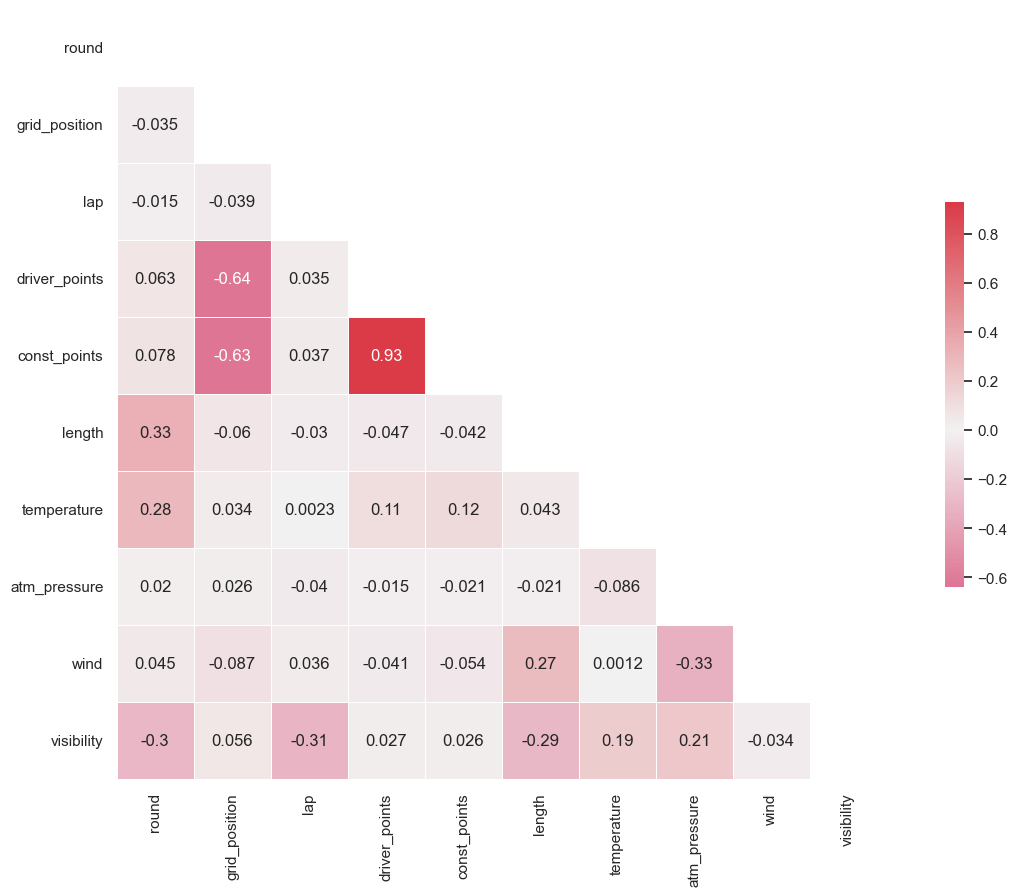

In [8]:
numeric_columns = safety.select_dtypes(include=np.number)

plt.figure(figsize=(15, 10))
sns.set(style='white')

mask = np.triu(np.ones_like(numeric_columns.corr(), dtype=bool))
cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(numeric_columns.corr(),
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5})

plt.show()

In [9]:
safety = safety.drop(columns='const_points', axis=1)

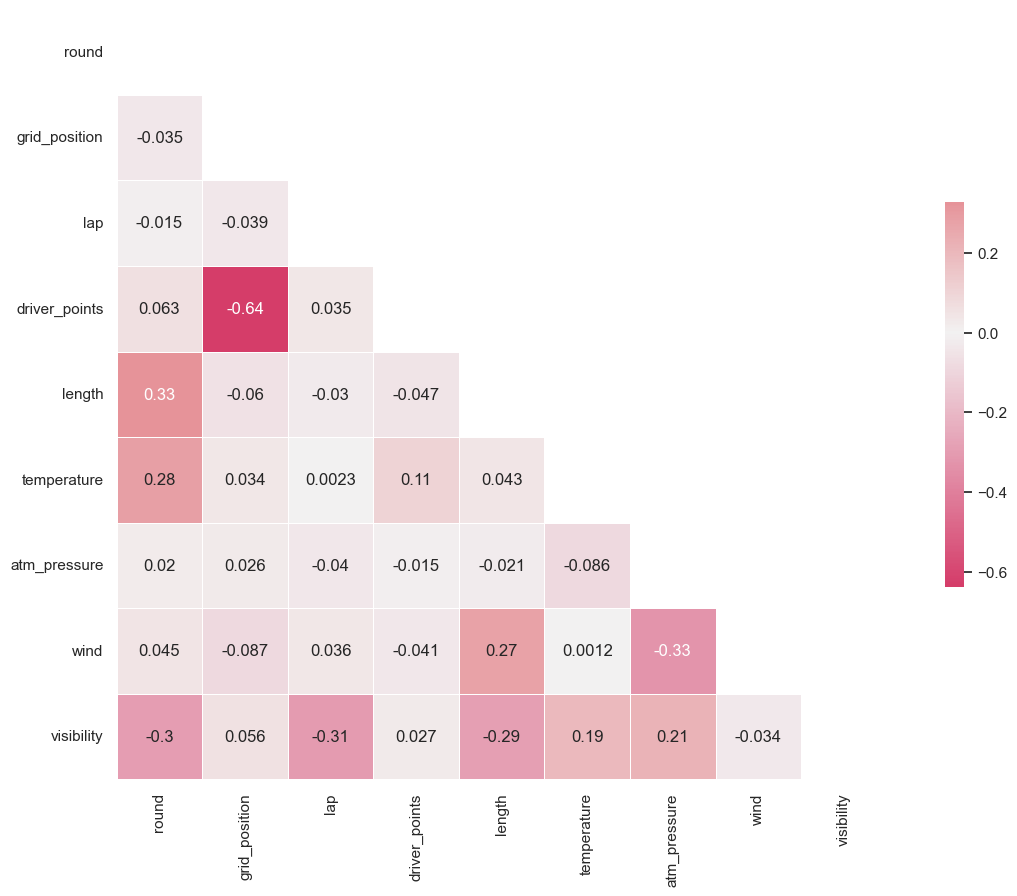

In [10]:
numeric_columns = safety.select_dtypes(include=np.number)

plt.figure(figsize=(15, 10))
sns.set(style='white')

mask = np.triu(np.ones_like(numeric_columns.corr(), dtype=bool))
cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(numeric_columns.corr(),
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5})

plt.show()

In [11]:
safety.head()

,circuit_name,location,country,year,round,grand_prix,date,time,grid_position,lap,forename,surname,dob,driver_nat,const_name,const_nat,safety_car,driver_points,length,temperature,atm_pressure,wind,visibility,cloudiness,rainfall
0,Circuit de Barcelona-Catalunya,Montmeló,Spain,2022-01-01,6,Spanish Grand Prix,2022-05-22,13:00:00,20,1,Nicholas,Latifi,1995-06-29,Canadian,Williams,British,False,0.00,4675,25,1011,20,10,clear,False
1,Circuit de Barcelona-Catalunya,Montmeló,Spain,2022-01-01,6,Spanish Grand Prix,2022-05-22,13:00:00,20,2,Nicholas,Latifi,1995-06-29,Canadian,Williams,British,False,0.00,4675,25,1011,20,10,clear,False
2,Circuit de Barcelona-Catalunya,Montmeló,Spain,2022-01-01,6,Spanish Grand Prix,2022-05-22,13:00:00,20,3,Nicholas,Latifi,1995-06-29,Canadian,Williams,British,False,0.00,4675,25,1011,20,10,clear,False
3,Circuit de Barcelona-Catalunya,Montmeló,Spain,2022-01-01,6,Spanish Grand Prix,2022-05-22,13:00:00,20,4,Nicholas,Latifi,1995-06-29,Canadian,Williams,British,False,0.00,4675,25,1011,20,10,clear,False
4,Circuit de Barcelona-Catalunya,Montmeló,Spain,2022-01-01,6,Spanish Grand Prix,2022-05-22,13:00:00,20,23,Nicholas,Latifi,1995-06-29,Canadian,Williams,British,False,0.00,4675,25,1010,22,10,clear,False


In [12]:
safety['forename'].value_counts()

forename
Nico         1106
Felipe       1037
Fernando     1021
Lewis         985
Sebastian     921
             ... 
Giedo          21
Martin         17
Bruno          12
Patrick        11
Franck         10
Name: count, Length: 90, dtype: int64

In [13]:
safety = safety.drop(columns=['circuit_name', 'location', 'country', 'grand_prix'], axis=1)

safety.head()

,year,round,date,time,grid_position,lap,forename,surname,dob,driver_nat,const_name,const_nat,safety_car,driver_points,length,temperature,atm_pressure,wind,visibility,cloudiness,rainfall
0,2022-01-01,6,2022-05-22,13:00:00,20,1,Nicholas,Latifi,1995-06-29,Canadian,Williams,British,False,0.00,4675,25,1011,20,10,clear,False
1,2022-01-01,6,2022-05-22,13:00:00,20,2,Nicholas,Latifi,1995-06-29,Canadian,Williams,British,False,0.00,4675,25,1011,20,10,clear,False
2,2022-01-01,6,2022-05-22,13:00:00,20,3,Nicholas,Latifi,1995-06-29,Canadian,Williams,British,False,0.00,4675,25,1011,20,10,clear,False
3,2022-01-01,6,2022-05-22,13:00:00,20,4,Nicholas,Latifi,1995-06-29,Canadian,Williams,British,False,0.00,4675,25,1011,20,10,clear,False
4,2022-01-01,6,2022-05-22,13:00:00,20,23,Nicholas,Latifi,1995-06-29,Canadian,Williams,British,False,0.00,4675,25,1010,22,10,clear,False


In [14]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(safety['surname'], safety['safety_car'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Estadístico de prueba chi-cuadrado:", chi2)
print("Valor p:", p_value)

Estadístico de prueba chi-cuadrado: 587.3908657102139
Valor p: 5.081354965892018e-72


In [15]:
contingency_table = pd.crosstab(safety['forename'], safety['safety_car'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Estadístico de prueba chi-cuadrado:", chi2)
print("Valor p:", p_value)

Estadístico de prueba chi-cuadrado: 349.2242967733023
Valor p: 1.6552458904029138e-32


In [16]:
contingency_table = pd.crosstab(safety['driver_nat'], safety['safety_car'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Estadístico de prueba chi-cuadrado:", chi2)
print("Valor p:", p_value)

Estadístico de prueba chi-cuadrado: 121.8431669167849
Valor p: 2.3953033348316297e-13


In [17]:
contingency_table = pd.crosstab(safety['const_name'], safety['safety_car'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Estadístico de prueba chi-cuadrado:", chi2)
print("Valor p:", p_value)

Estadístico de prueba chi-cuadrado: 153.29540809096903
Valor p: 1.7798965459103623e-15


In [18]:
contingency_table = pd.crosstab(safety['const_nat'], safety['safety_car'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Estadístico de prueba chi-cuadrado:", chi2)
print("Valor p:", p_value)

Estadístico de prueba chi-cuadrado: 57.61435531843781
Valor p: 1.3972279460366154e-07


In [19]:
# Determinamos con la prueba de chi2 que existe una asociación significativa entre las dos variables categóricas, por ende,
# mantenemos esas columnas en el dataframe para realizar el machine learning.

In [20]:
#safety['time'] = pd.to_datetime(safety['time'], errors='coerce')

In [21]:
safety.dtypes

year             datetime64[ns]
round                     int64
date             datetime64[ns]
time                     object
grid_position             int32
lap                       int32
forename                 object
surname                  object
dob              datetime64[ns]
driver_nat               object
const_name               object
const_nat                object
safety_car                 bool
driver_points           float64
length                    int64
temperature               int64
atm_pressure              int64
wind                      int64
visibility                int64
cloudiness               object
rainfall                   bool
dtype: object

In [22]:
columns_to_encode = ['time', 'forename', 'surname', 'driver_nat', 'const_name', 'const_nat', 'cloudiness']

encoded_data = pd.get_dummies(safety, columns = columns_to_encode)

encoded_data.head()

,year,round,date,grid_position,lap,dob,safety_car,driver_points,length,temperature,atm_pressure,wind,visibility,rainfall,time_12:00:00,time_13:00:00,time_13:10:00,time_14:00:00,forename_Adrian,forename_Alexander,...,const_name_Toyota,const_name_Tyrrell,const_name_Virgin,const_name_Williams,const_nat_American,const_nat_Austrian,const_nat_British,const_nat_Dutch,const_nat_French,const_nat_German,const_nat_Indian,const_nat_Irish,const_nat_Italian,const_nat_Japanese,const_nat_Malaysian,const_nat_Russian,const_nat_Spanish,const_nat_Swiss,cloudiness_clear,cloudiness_cloudy
0,2022-01-01,6,2022-05-22,20,1,1995-06-29,False,0.00,4675,25,1011,20,10,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,2022-01-01,6,2022-05-22,20,2,1995-06-29,False,0.00,4675,25,1011,20,10,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
2,2022-01-01,6,2022-05-22,20,3,1995-06-29,False,0.00,4675,25,1011,20,10,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
3,2022-01-01,6,2022-05-22,20,4,1995-06-29,False,0.00,4675,25,1011,20,10,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,2022-01-01,6,2022-05-22,20,23,1995-06-29,False,0.00,4675,25,1010,22,10,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [23]:
y = encoded_data['safety_car']
X = encoded_data.drop('safety_car', axis = 1)

In [24]:
y.shape, X.shape

((24775,), (24775, 289))

In [25]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       train_size = 0.8, 
                                       test_size = 0.2,
                                       random_state = 42
                                      )


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19820, 289), (4955, 289), (19820,), (4955,))

In [26]:
model_lazy = LazyRegressor()

model_lazy.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [05:51<00:00,  8.37s/it]


(                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
 Model                                                                         
 DecisionTreeRegressor                        1.00       1.00  0.00        0.03
 RandomForestRegressor                        1.00       1.00  0.00        1.14
 BaggingRegressor                             1.00       1.00  0.00        0.12
 ExtraTreeRegressor                           1.00       1.00  0.00        0.02
 XGBRegressor                                 1.00       1.00  0.00        0.29
 ExtraTreesRegressor                          1.00       1.00  0.00        0.49
 LGBMRegressor                                1.00       1.00  0.00        0.15
 HistGradientBoostingRegressor                1.00       1.00  0.00        0.61
 GradientBoostingRegressor                    0.73       0.75  0.06        1.13
 KNeighborsRegressor                          0.60       0.62  0.08        0.12
 MLPRegressor                           